#### QF603 Alpha Generation Project
#### H1: ICHI with CCI
#### H0: CAPM


#### No.1 Libraries and updates

In [1]:
!pip install pandas-datareader
!pip install yfinance
!pip install seaborn
!pip install --upgrade pandas
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np # for numerical computing
import pandas as pd # for tabular data manipulation
import matplotlib.pyplot as plt # for data graphics
import matplotlib as mpl
import datetime
import statsmodels.formula.api as smf
%matplotlib inline
import statsmodels.api as sm

from scipy import stats


In [3]:
!pip install ta

from ta.trend import IchimokuIndicator

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas_datareader.data as web 
from pandas_datareader import data as pdr

import yfinance as yf
(
    yf
    .pdr_override()
)
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

import os

from scipy.interpolate import interp1d

#### No. 2 Data collection and validation

In [5]:
stock_dict_short = \
    {
    'UOB': "U11.SI",
    'DBS': "D05.SI",
    'Tencent': 'TCEHY'}

In [6]:
stock_dict = \
    {
    'DBS': "D05.SI",
    'UOB': "U11.SI",
    'OCBC': "O39.SI",
    'Tencent': 'TCEHY',
    'Zoom': "ZM",
    'Apple': "AAPL",
    'MicroSoft': "MSFT",
    'Netflix': "NFLX",
    'Amazon': "AMZN",
    'Boeing': "BA",
    'UAirLine': "UAL",
    'GoldmanSachs': "GS",
    'JPMorgan': "JPM",
    'SPETF': "SPY",
    'SP500': "^SPX"
    }

In [7]:
# Intended list of benchmarks

TICKERS =\
    [
    "^TNX",
    "SPY",
    "^SPX"
    ]

In [8]:
start = \
(
    datetime
    .date(2013, 8, 1)
)

end = \
(
    datetime
    .date(2023, 9, 24)
)

In [9]:
def get_data_into_csv(dict_of_tickers, start, end):
    data = {}
    for name, ticker in dict_of_tickers.items():
        # Get the current working directory (root folder)
        root_folder = os.getcwd()
        # Specify the file name to check for existence
        file_name = f"{name}.csv"  
        # Replace with the name of the file we are creating
        
        # Check if the file exists in the root folder
        file_exists = os.path.exists(os.path.join(root_folder, file_name))

        if not file_exists:
            temp = pdr.get_data_yahoo(ticker, start, end)
            temp.to_csv(f"{name}.csv")
            
        data[f'{name}'] = pd.read_csv(f"{name}.csv").set_index('Date')
        data[f'{name}'].index = pd.to_datetime(data[f'{name}'].index)
    return data

In [10]:
def clean_data(dict_of_df):
    for stock, df in dict_of_df.items():
        df.dropna(axis=0, inplace=True)
    return

In [11]:
stock = get_data_into_csv(stock_dict_short, start, end)
clean_data(stock)

In [12]:
stock["DBS"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-01,16.950001,17.280001,16.910000,17.240000,11.224672,8415000
2013-08-02,17.350000,17.559999,17.350000,17.540001,11.420001,5235000
2013-08-05,17.450001,17.500000,17.280001,17.400000,11.328845,2485000
2013-08-06,17.270000,17.350000,17.000000,17.090000,11.127012,3661000
2013-08-07,17.020000,17.219999,17.020000,17.200001,11.198630,2934000
...,...,...,...,...,...,...
2023-09-18,34.490002,34.490002,34.119999,34.230000,34.230000,2738600
2023-09-19,34.369999,34.369999,33.799999,33.830002,33.830002,2658500
2023-09-20,33.950001,33.950001,33.459999,33.680000,33.680000,2635300


#### No.3 Indicator functions (ichmoku and CCI)

> CCI

In [13]:
def get_CCI(stock, nCCI):
    
    CCI = pd.DataFrame()
    CCI["TP"] =\
    (
        stock[['High', 'Low', 'Close']]
        .mean(axis = 1)
    )
    
    CCI['SMA_TP'] = \
    (
        CCI['TP']
        .rolling(nCCI)
        .mean()
    )
    
    # Calculate Mean Deviation (MD)
    CCI['MD'] = CCI['TP'] - CCI['SMA_TP'].shift(1)
    CCI['MD'] = CCI['MD'].abs()
    CCI['MD'] = CCI['MD'].rolling(window=nCCI).mean()

    CCI['CCI'] = \
    (
        (CCI['TP'] - CCI['SMA_TP']) / \
        (0.015 * CCI['MD'])
    )
    
    return CCI

In [14]:
UOB_CCI = get_CCI(stock["UOB"], 20)
UOB_CCI

,TP,SMA_TP,MD,CCI
Date,,,,
2013-08-01,21.699999,NaN,NaN,NaN
2013-08-02,21.940000,NaN,NaN,NaN
2013-08-05,21.886667,NaN,NaN,NaN
2013-08-06,21.743333,NaN,NaN,NaN
2013-08-07,21.740000,NaN,NaN,NaN
...,...,...,...,...
2023-09-18,29.003333,28.420000,0.446300,87.136236
2023-09-19,28.643333,28.460500,0.401083,30.389843
2023-09-20,28.570000,28.497333,0.352025,13.761607


> ichmoku

In [15]:
def get_ICHI(stock, nTS, nKS, nSS):
    ICHI = pd.DataFrame()
    # Calculate Ichimoku Cloud values
    ichimoku = IchimokuIndicator(high=stock['High'], low=stock['Low'], window1=9, window2=26, window3=52)
    ICHI['TS'] = ichimoku.ichimoku_a()
    ICHI['KS'] = ichimoku.ichimoku_b()
    ICHI['SSA'] = ichimoku.ichimoku_base_line()
    ICHI['SSB'] = ichimoku.ichimoku_conversion_line()
    ICHI['LS'] = stock['Close'].shift(-nKS)

    return ICHI

In [16]:
UOB_ICHI = get_ICHI(stock["UOB"], 9, 26, 52)
UOB_ICHI

,TS,KS,SSA,SSB,LS
Date,,,,,
2013-08-01,NaN,21.65,NaN,NaN,20.360001
2013-08-02,NaN,21.80,NaN,NaN,20.450001
2013-08-05,NaN,21.80,NaN,NaN,20.600000
2013-08-06,NaN,21.80,NaN,NaN,20.809999
2013-08-07,NaN,21.80,NaN,NaN,21.129999
...,...,...,...,...,...
2023-09-18,28.645000,28.69,28.509999,28.780000,NaN
2023-09-19,28.645000,28.69,28.509999,28.780000,NaN
2023-09-20,28.645000,28.69,28.509999,28.780000,NaN


#### No. 4 Model Regression

In [17]:
ts_info = pd.concat([UOB_CCI, UOB_ICHI], axis = 1)
ts_info.index = pd.to_datetime(ts_info.index)
ts_data = stock["UOB"][['Close']]
ts_data.index = pd.to_datetime(ts_data.index)

In [18]:
def ACF_TS(TS):
    acf_result = sm.tsa.acf(TS, fft=False)

    plt.figure(figsize=(12, 6))
    plt.stem(acf_result)
    plt.xlabel('Lag')
    plt.ylabel('ACF Value')
    plt.title('Autocorrelation Function (ACF)')
    plt.grid(True)
    plt.show()    
    
    return

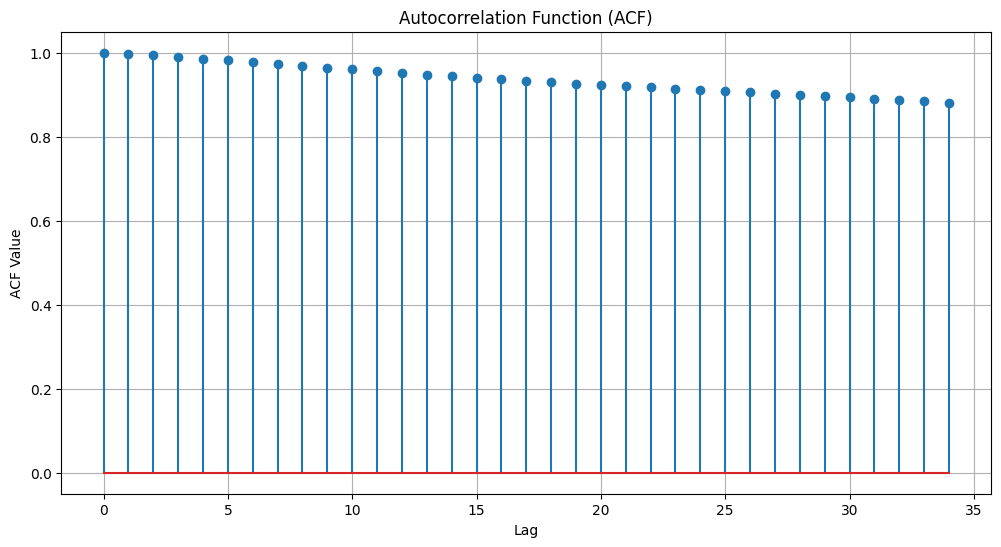

In [19]:
ACF_TS(ts_data)

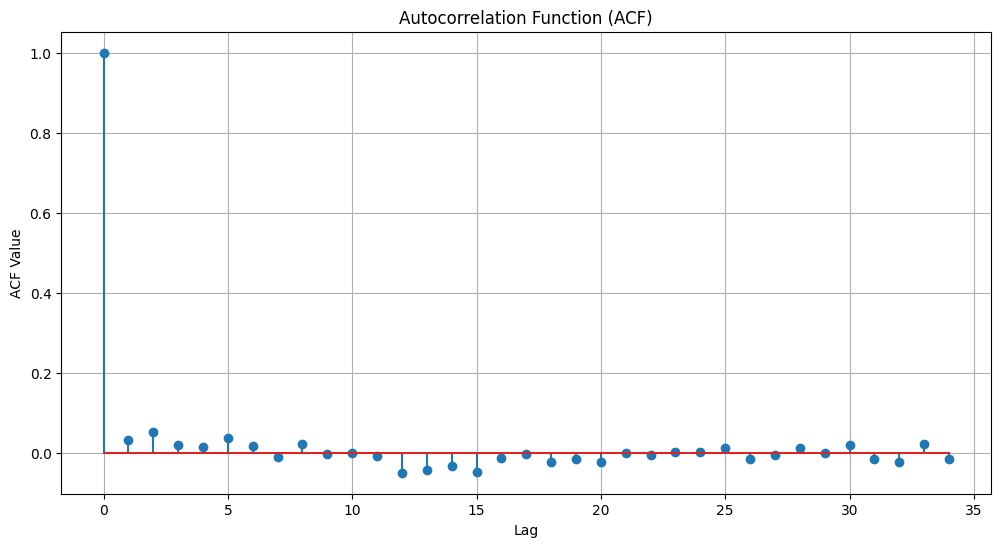

In [20]:
ACF_TS(ts_data.diff().dropna())

In [21]:
def Decom_TS(TS):
    ts_data_resampled = TS.resample('D').ffill()

    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(ts_data_resampled, model='additive')


    # Access the decomposed components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the decomposed components
    plt.figure(figsize=(12, 6))

    plt.subplot(411)
    plt.plot(ts_data, label='Original')
    plt.legend(loc='best')

    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')

    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend(loc='best')

    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()    
    
    result =\
    {
        'Trend': trend,
        'Seasonal': seasonal,
        'Residual': residual                
    }
    
    return pd.DataFrame(result)

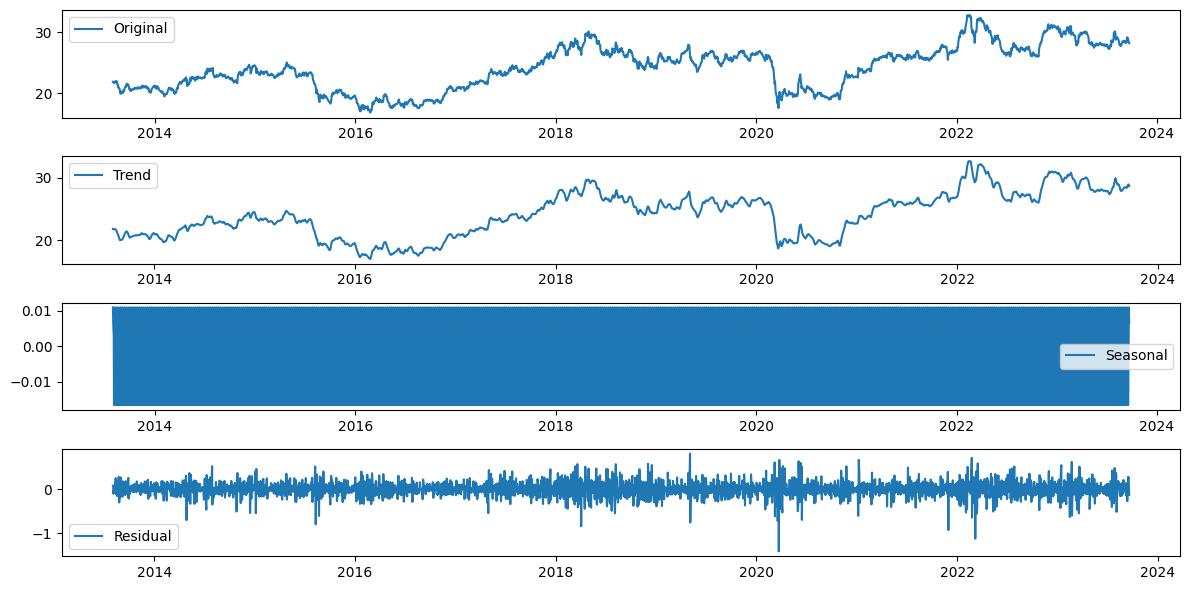

,Trend,Seasonal,Residual
Date,,,
2013-08-01,NaN,0.010981,NaN
2013-08-02,NaN,0.006674,NaN
2013-08-03,NaN,0.004818,NaN
2013-08-04,21.838572,0.003137,0.078292
2013-08-05,21.831429,-0.016585,0.055157
...,...,...,...
2023-09-18,28.831429,-0.016585,0.085156
2023-09-19,28.691429,-0.009950,-0.131480
2023-09-20,NaN,0.000924,NaN


In [22]:
Decom_TS(ts_data)

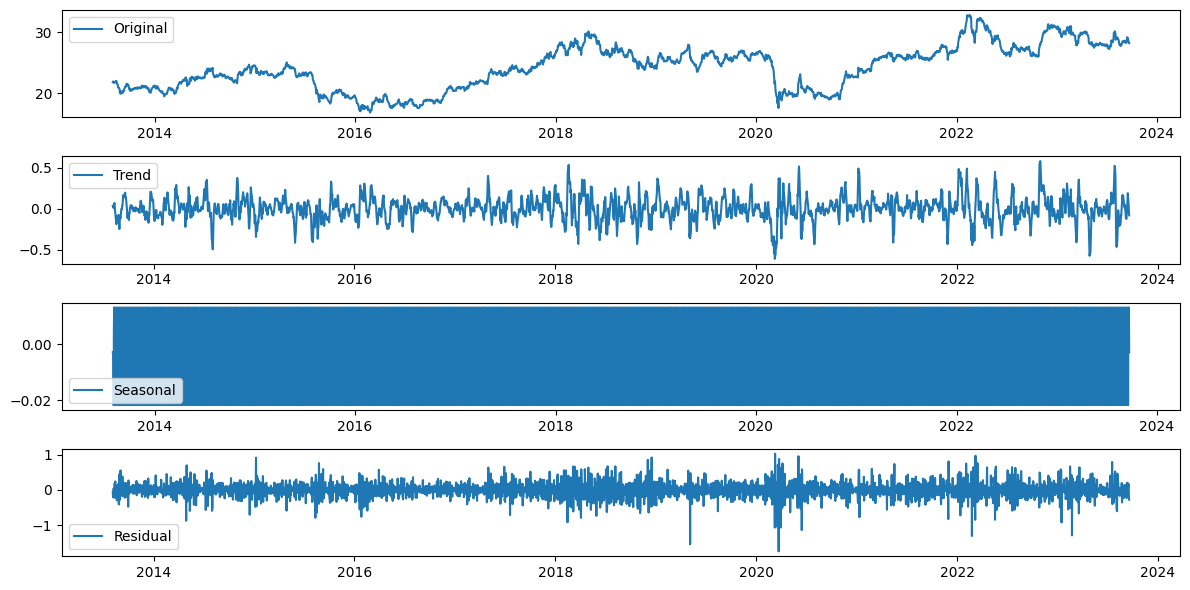

,Trend,Seasonal,Residual
Date,,,
2013-08-02,NaN,-0.002870,NaN
2013-08-03,NaN,-0.002824,NaN
2013-08-04,NaN,-0.002797,NaN
2013-08-05,0.035715,-0.021660,-0.064054
2013-08-06,0.027143,0.005680,-0.212823
...,...,...,...
2023-09-18,-0.044285,-0.021660,-0.234056
2023-09-19,-0.080000,0.005680,-0.275680
2023-09-20,NaN,0.013072,NaN


In [23]:
Decom_TS(ts_data.diff().dropna())

In [24]:
def OLS_TS(TS, INFO, intercept = 0):
    OLS = pd.concat([TS, INFO], axis = 1).dropna()
    INFO_list = INFO.columns.tolist()
    TS_target = TS.columns.tolist()    
    if intercept == 1:
        OLS['intercept'] = 1
        INFO_list = INFO.columns.tolist() + ['intercept']    

    OLS[TS_target] = OLS[TS_target].shift(-1)
    OLS.dropna(inplace = True)
    # Define the independent variables (predictors)
    X = OLS[INFO_list]  # Include 'intercept' for the intercept term

    # Define the dependent variable (target)
    y = OLS[TS_target]

    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()
    
    return model

In [25]:
OLS_TS(ts_data, ts_info, 1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 5.178e+04
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:19:02   Log-Likelihood:                -307.71
No. Observations:                2481   AIC:                             633.4
Df Residuals:                    2472   BIC:                             685.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TP             1.0305      0.021     50.254      0.000       0.990       1.071
SMA_TP         0.0346      0.027      1.302      0.193      -0.018       0.087
MD             0.0064      0.015      0.422      0.673      -0.023       0.036
CCI            0.0003      0.000      2.189      0.029    2.76e-05       0.001
TS            -0.0359      0.012     -2.964      0.003      -0.060      -0.012
KS             0.0067      0.010      0.647      0.518      -0.014       0.027
SSA            0.0168      0.018      0.936      0.349      -0.018       0.052
SSB           -0.0885      0.020     -4.345      0.000      -0.128      -0.049
LS             0.0354      0.004      9.122      0.000       0.028       0.043
intercept      0.0057      0.040      0.143      0.886      -0.073       0.085
==============================================================================
Omnibus:                      228.180   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1384.028
Skew:                          -0.180   Prob(JB):                    2.90e-301
Kurtosis:                       6.641   Cond. No.                     4.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.43e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
OLS_outcome = OLS_TS(ts_data, ts_info[['TP', 'TS', 'SSB']])
OLS_outcome.params.index

Index(['TP', 'TS', 'SSB'], dtype='object')

#### No. 5 Price movement prediction

In [27]:
def sig_OLS_predict(stock, OLS_obj):
    INFO_list = OLS_obj.params.index.tolist()
    outcome = stock[['Close']]
    outcome[INFO_list] =  pd\
                .concat([get_ICHI(stock, 9, 26, 52), \
                         get_CCI(stock, 20)], axis = 1)\
                        [INFO_list]    
    # the PREDICTION is for tomorrow's close price, based on today's indicators
    outcome["PREDICTION"] = outcome["Close"].shift(-1)
    outcome.dropna(inplace = True)
    
    OLS =\
        np \
        .linalg \
        .lstsq(outcome[INFO_list],
               outcome["PREDICTION"],
               rcond = None)[0]   

    outcome["PREDICTION"] =\
        np.dot(outcome[INFO_list], 
                OLS)
    
    outcome["RETURN"] = np.log(outcome["Close"] / outcome["Close"].shift(1))
    # the bias is basically view on market, 
    # based on predicted close would be higher or lower than today's Close
    # a threshold is defined for similiar purpose as confidence intervals    
    threshold = 0.002
    outcome["bias"] = \
    (
        np.where\
            (abs(outcome["PREDICTION"] / outcome["Close"] - 1) > threshold,\
                 np.sign(np.log(outcome["PREDICTION"] / outcome["Close"])), 0)    
    ) 
    
    # once there is a bias, a trade would result in the NEXT day's return 
    outcome["STRATEGY"] = outcome["bias"].shift(1)
    outcome.dropna(inplace = True)
    outcome["STRATEGY"] = outcome["STRATEGY"] * outcome["RETURN"]

    outcome["total"] = \
        outcome["STRATEGY"] \
        .cumsum() \
        .apply(np.exp)

    return outcome

In [28]:
Mean_Rev = sig_OLS_predict(stock["UOB"], OLS_outcome)
Mean_Rev

,Close,TP,TS,SSB,PREDICTION,RETURN,bias,STRATEGY,total
Date,,,,,,,,,
2013-09-10,20.360001,20.410000,20.6000,20.240,20.445097,-0.004411,1.0,0.004411,1.004420
2013-09-11,20.450001,20.426667,20.5750,20.240,20.461784,0.004411,0.0,0.004411,1.008860
2013-09-12,20.600000,20.623333,20.6575,20.405,20.656456,0.007308,1.0,0.000000,1.008860
2013-09-13,20.809999,20.820000,20.6775,20.445,20.865753,0.010143,1.0,0.010143,1.019145
2013-09-16,21.129999,21.173333,20.7875,20.665,21.224448,0.015260,1.0,0.015260,1.034816
...,...,...,...,...,...,...,...,...,...
2023-09-15,29.200001,29.226667,28.6450,28.780,29.257171,0.007218,0.0,-0.007218,2.096369
2023-09-18,28.900000,29.003333,28.6450,28.780,29.014181,-0.010327,1.0,-0.000000,2.096369
2023-09-19,28.549999,28.643333,28.6450,28.780,28.622494,-0.012185,1.0,-0.012185,2.070981


In [29]:
def plt_strategy_return(signals):
    
    signals[["RETURN", "STRATEGY"]] \
    .dropna() \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
         )   
    return 

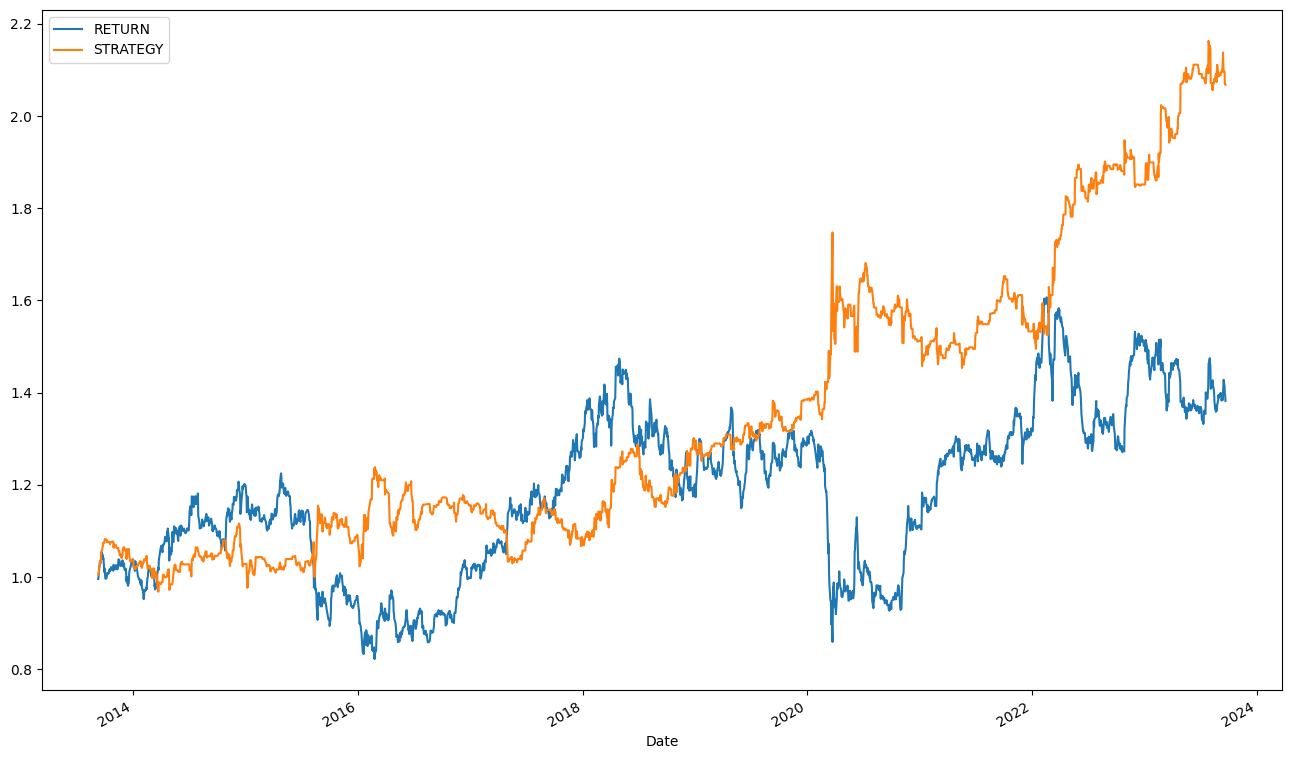

In [30]:
plt_strategy_return(Mean_Rev)

In [31]:
Mean_Rev

,Close,TP,TS,SSB,PREDICTION,RETURN,bias,STRATEGY,total
Date,,,,,,,,,
2013-09-10,20.360001,20.410000,20.6000,20.240,20.445097,-0.004411,1.0,0.004411,1.004420
2013-09-11,20.450001,20.426667,20.5750,20.240,20.461784,0.004411,0.0,0.004411,1.008860
2013-09-12,20.600000,20.623333,20.6575,20.405,20.656456,0.007308,1.0,0.000000,1.008860
2013-09-13,20.809999,20.820000,20.6775,20.445,20.865753,0.010143,1.0,0.010143,1.019145
2013-09-16,21.129999,21.173333,20.7875,20.665,21.224448,0.015260,1.0,0.015260,1.034816
...,...,...,...,...,...,...,...,...,...
2023-09-15,29.200001,29.226667,28.6450,28.780,29.257171,0.007218,0.0,-0.007218,2.096369
2023-09-18,28.900000,29.003333,28.6450,28.780,29.014181,-0.010327,1.0,-0.000000,2.096369
2023-09-19,28.549999,28.643333,28.6450,28.780,28.622494,-0.012185,1.0,-0.012185,2.070981


In [32]:
def cal_MDD(performs):
    MDD = \
    (
    pd
    .DataFrame(index = performs.index)
    .fillna(0.0)
    )
    
    MDD['Max'] = performs["total"].cummax()
    MDD['Drawdown'] = performs["total"] - MDD['Max']
    
    MDD = MDD.dropna()
    
    MDD['DD_Flag'] = 0
    DD = []
    flag = 0
    nDD = 1
    
    for idx in MDD.index:
        if MDD.loc[idx]['Drawdown'] == 0:
            # flag is to rememeber if in DrawDown period
            if flag == 0:
                continue
            else:
                # a DD period is just ended
                # clear flag, ready for next DD seriel number
                flag = 0
                nDD += 1
        # if Drawdown < 0, entering a DD period
        else:
            flag = 1
            MDD.loc[idx, 'DD_Flag'] = nDD
            
    grouped = MDD[MDD['DD_Flag'] != 0].groupby('DD_Flag')


    for flags, group in grouped:

        s_date = group.index.min()
        e_date = group.index.max()
        days = (e_date.to_pydatetime() - s_date.to_pydatetime()).days
        loss = group['Drawdown'].min()
        
        DD += [[flags, s_date, e_date, days, loss]]
    DD = pd.DataFrame(DD)
    column_names = ['S/N', 'DD_start', 'DD_end', 'Days', 'DD_Max']
    
    DD.columns = column_names
    return [MDD, DD]

In [33]:
MDD_perform = cal_MDD(Mean_Rev)

In [34]:
def print_grouped_df(grouped_df):
# grouped object is dict, iterator includes keys and values
    for group_name, group_data in grouped_df.items():
        print(group_name)
        print(group_data)

In [35]:
MDD_perform[1]

,S/N,DD_start,DD_end,Days,DD_Max
0,1,2013-09-17,2013-09-18,1,-0.002938
1,2,2013-10-07,2014-11-27,416,-0.113832
2,3,2014-12-08,2014-12-08,0,-0.000911
3,4,2014-12-15,2015-08-24,252,-0.139185
4,5,2015-08-26,2016-02-05,163,-0.131913
5,6,2016-02-19,2016-02-23,4,-0.000703
6,7,2016-02-25,2016-02-25,0,-0.014527
7,8,2016-02-29,2018-04-17,778,-0.208810
8,9,2018-04-23,2018-05-03,10,-0.002503
9,10,2018-05-08,2018-05-08,0,-0.002147


In [36]:
def see_perform(performs):
    performance = []
    
    ACCURACY =\
        np \
        .sign(Mean_Rev["STRATEGY"]
             ) \
        .value_counts()
    ACCURACY.index = ['Neutral', 'WIN', 'LOSS']
    ACCURACY = pd.DataFrame(ACCURACY)
    performance = [ACCURACY]
    performance += cal_MDD(performs)
    
    return performance
    
    

In [37]:
see_perform(Mean_Rev)[0]

,count
Neutral,1306
WIN,632
LOSS,582


In [38]:
len(stock)

3

the performance for UOB is plot in sequence: 
the performance for DBS is plot in sequence: 
the performance for Tencent is plot in sequence: 


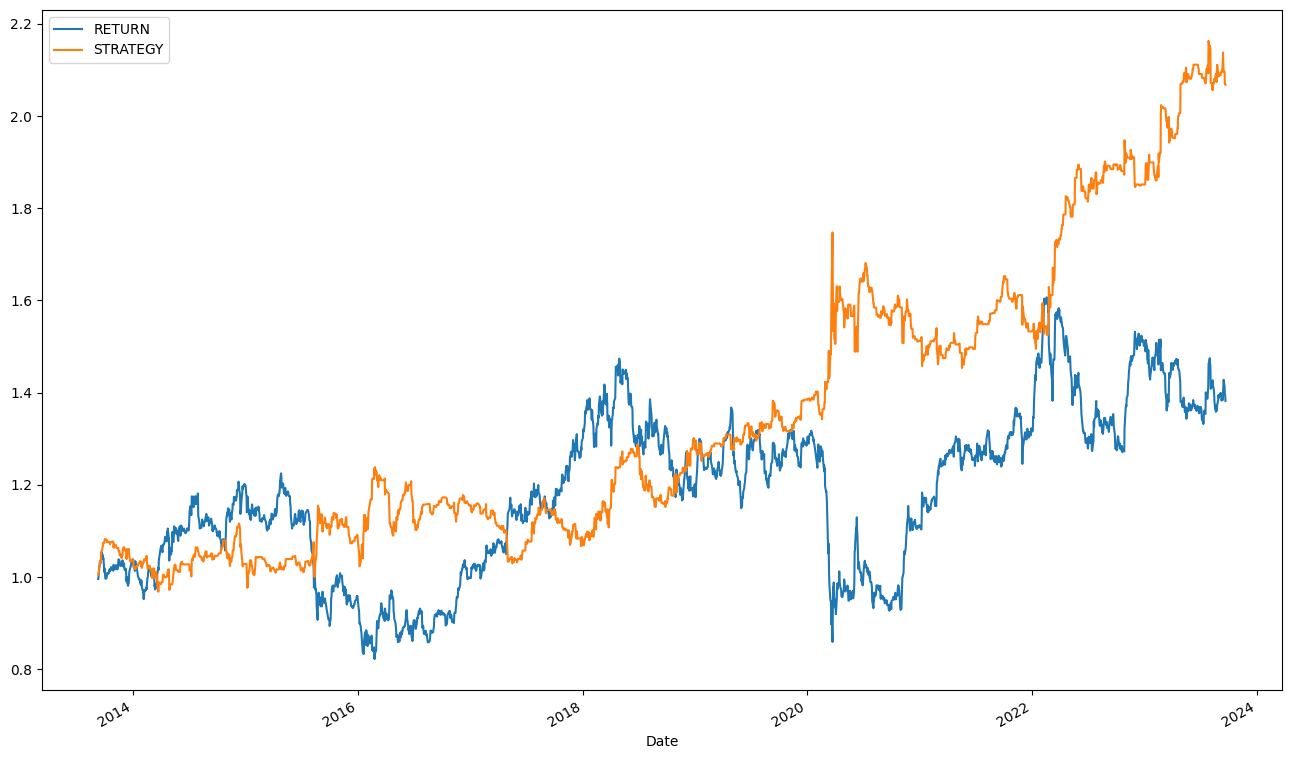

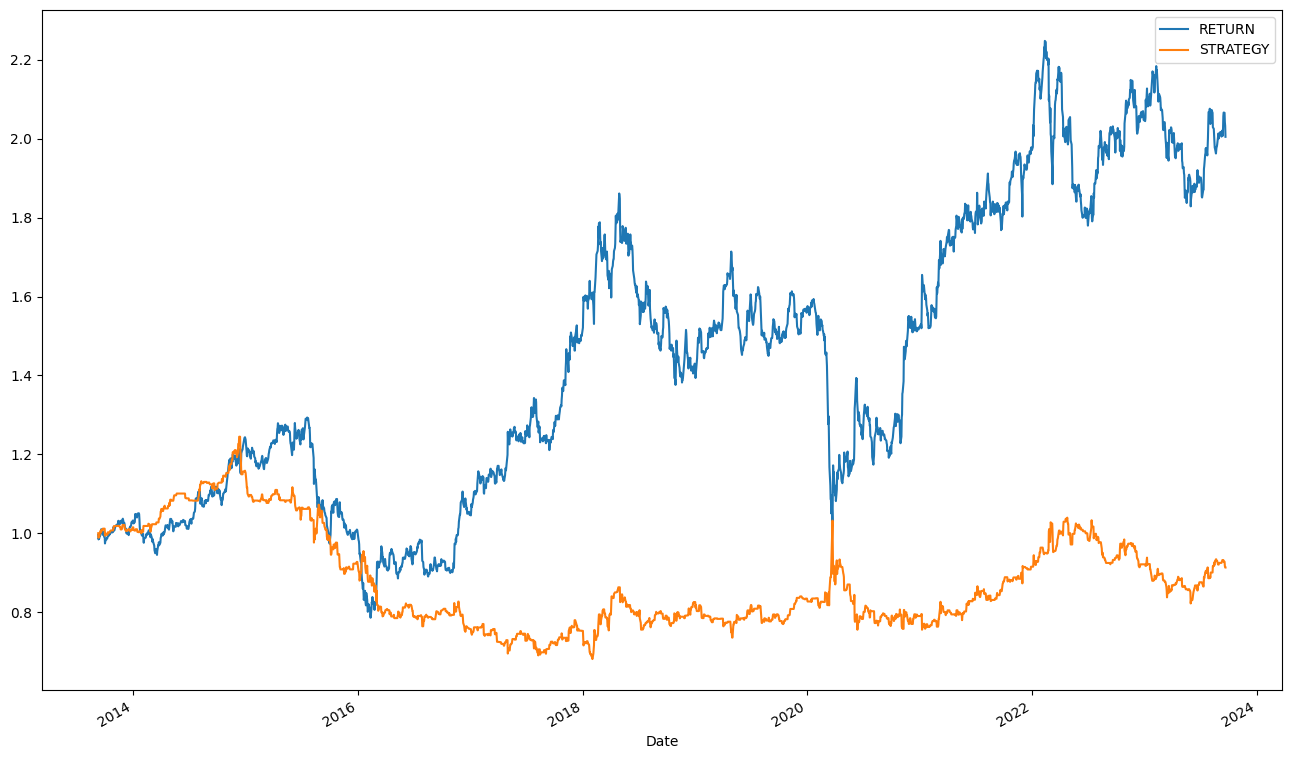

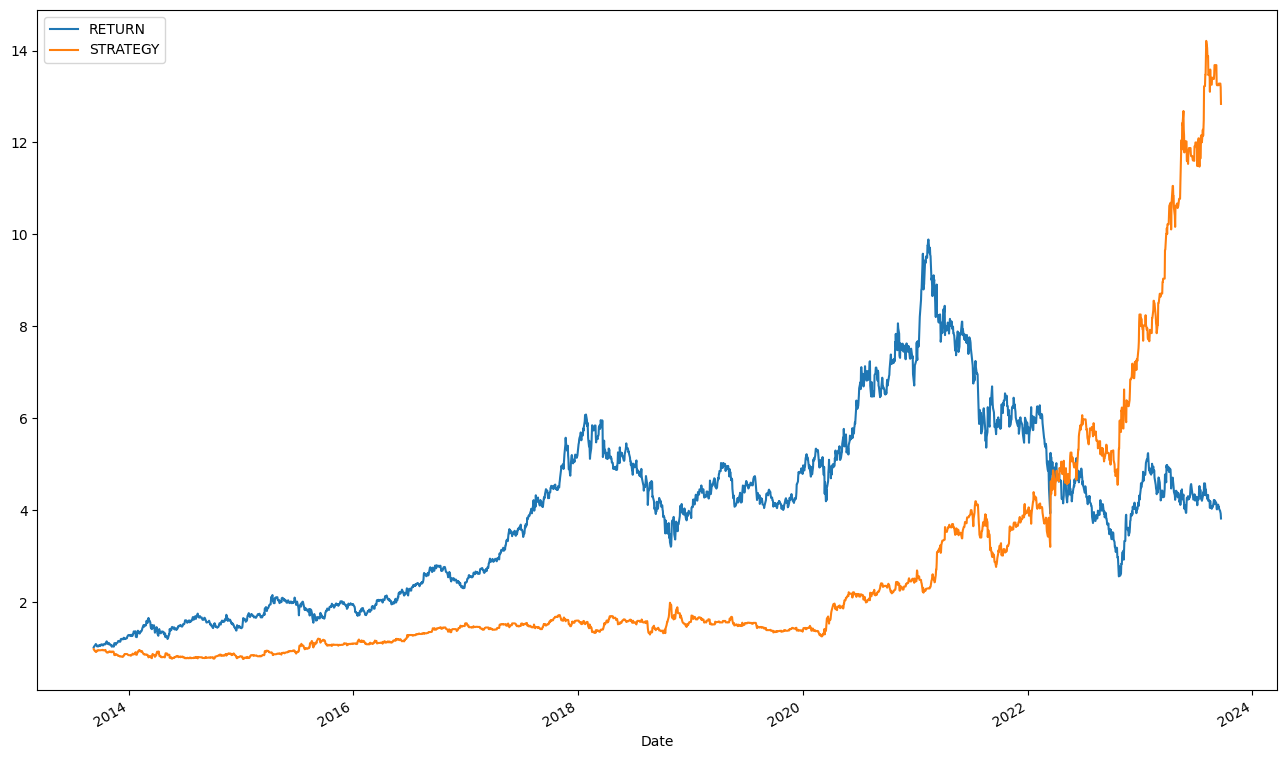

In [39]:
for name, df in stock.items():
    
    test_run = sig_OLS_predict(stock[f"{name}"], OLS_outcome)
    pf = cal_MDD(test_run)
    print(f"the performance for {name} is plot in sequence: ")
    plt_strategy_return(test_run)
    

#### No. 6 Signal Generation

#### No. 7 Signal visualization

In [119]:
def plot_all_returns(more_stocks, start, end, OLS_info): 

    full_stocks = get_data_into_csv(stock_dict, start, end)
    clean_data(full_stocks)
    all_returns = {}

    for name, df in full_stocks.items():
        
        test_run = sig_OLS_predict(full_stocks[f"{name}"], OLS_info)
        pf = cal_MDD(test_run)
        
        plt_strategy_return(test_run)

        all_returns[f'{name}'] = test_run['total'][-1]
        
        
    all_returns = pd.DataFrame(list(all_returns.items()), columns=['Stock', 'Mean_Rev'])
    all_returns.set_index('Stock', inplace=True)
    
    
    
    return all_returns


,Mean_Rev
Stock,
DBS,0.912998
UOB,2.068079
OCBC,2.586430
Tencent,12.838765
Zoom,3.790199
Apple,6.398005
MicroSoft,26.645609
Netflix,6.596154
Amazon,2.694099


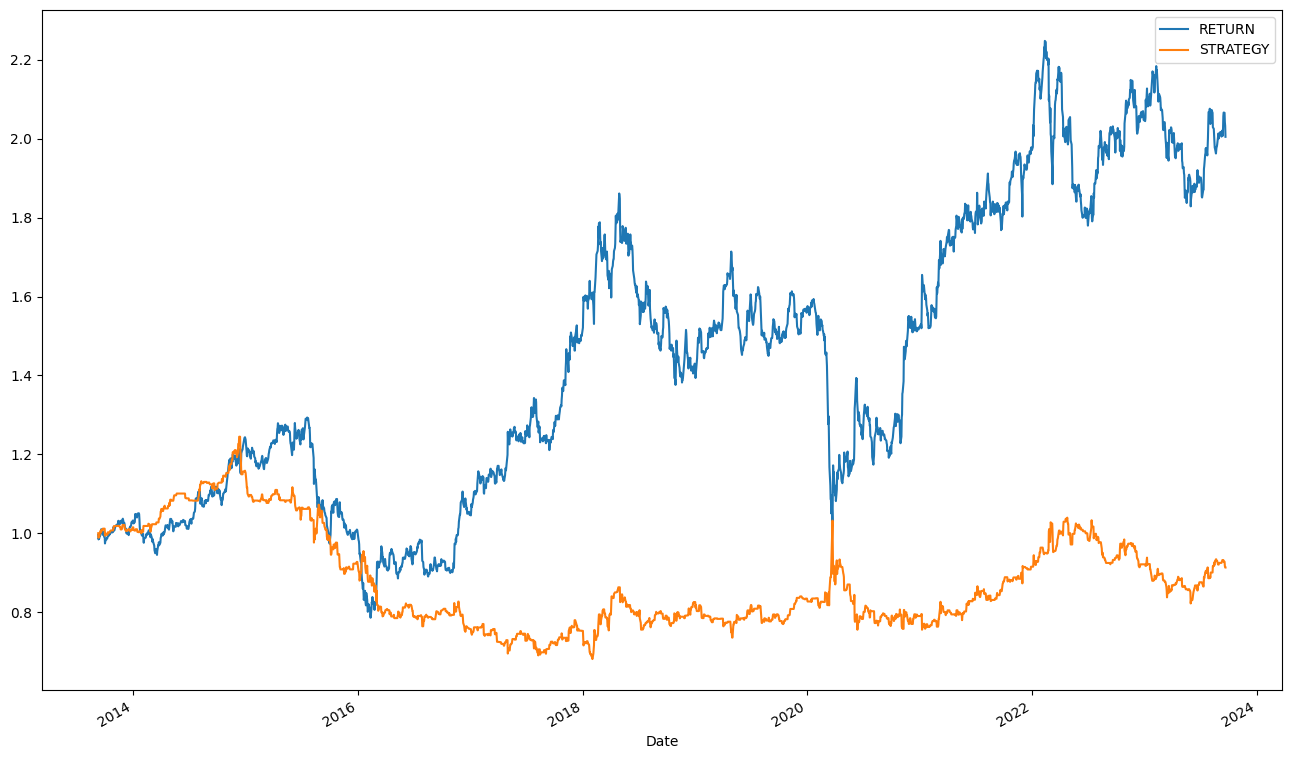

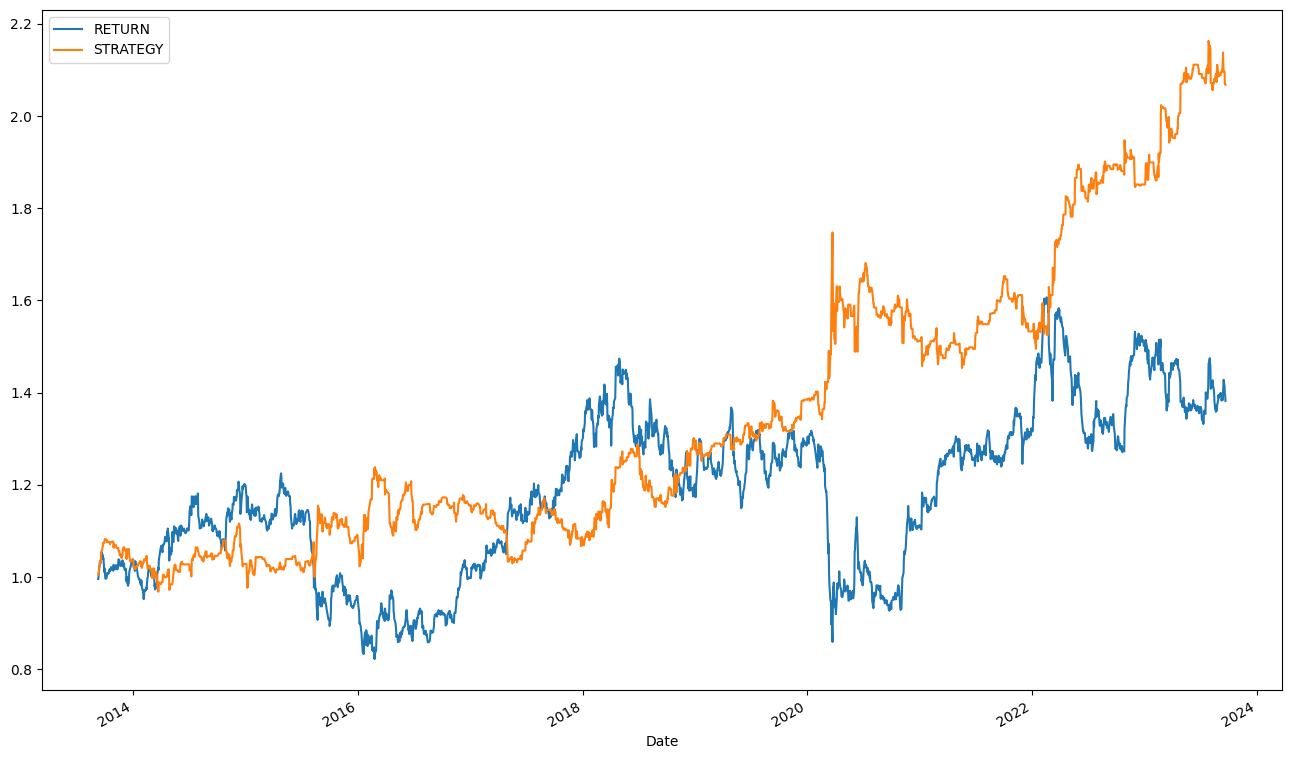

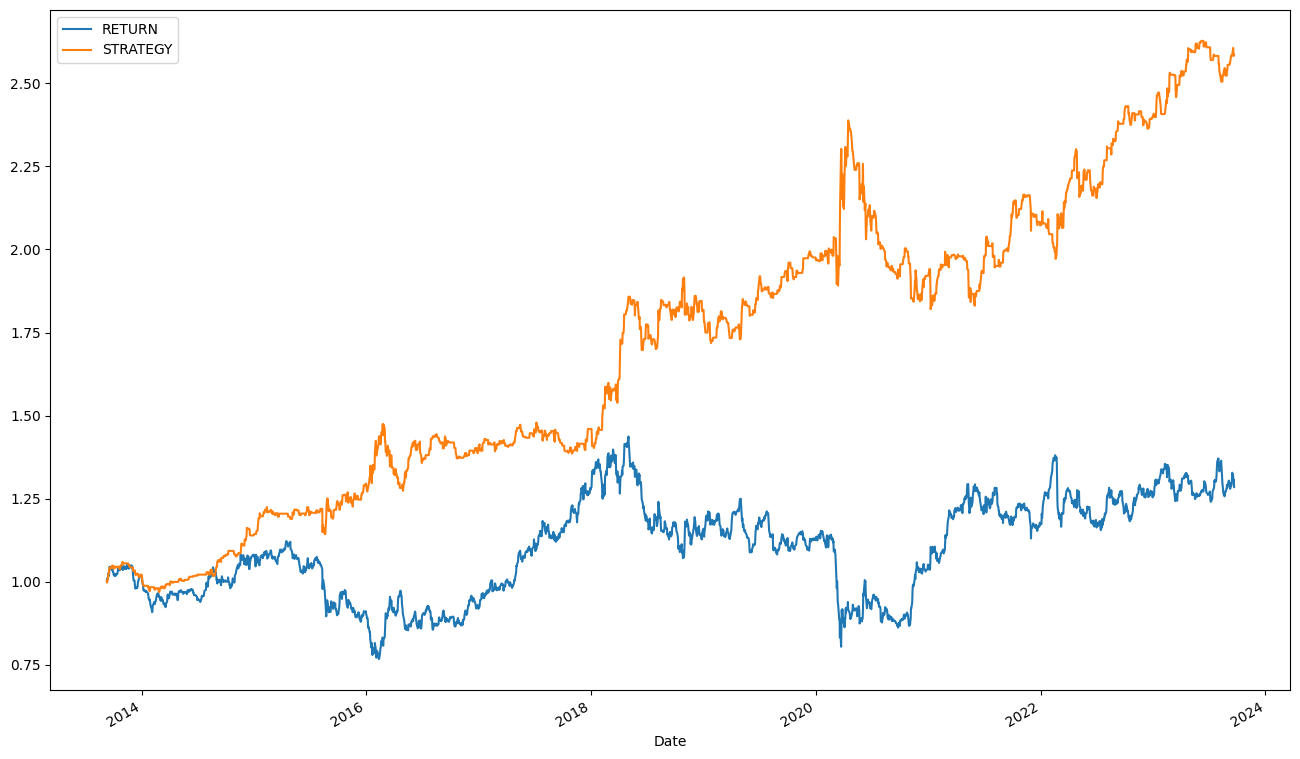

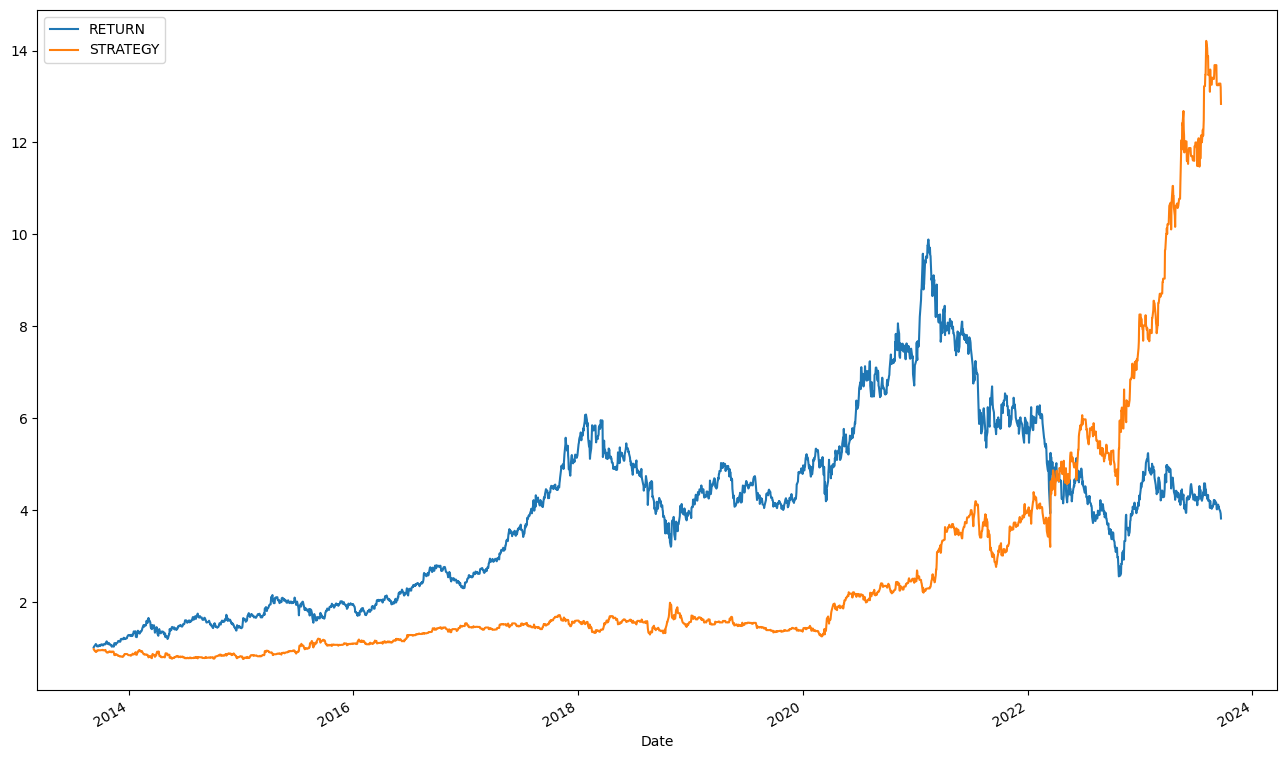

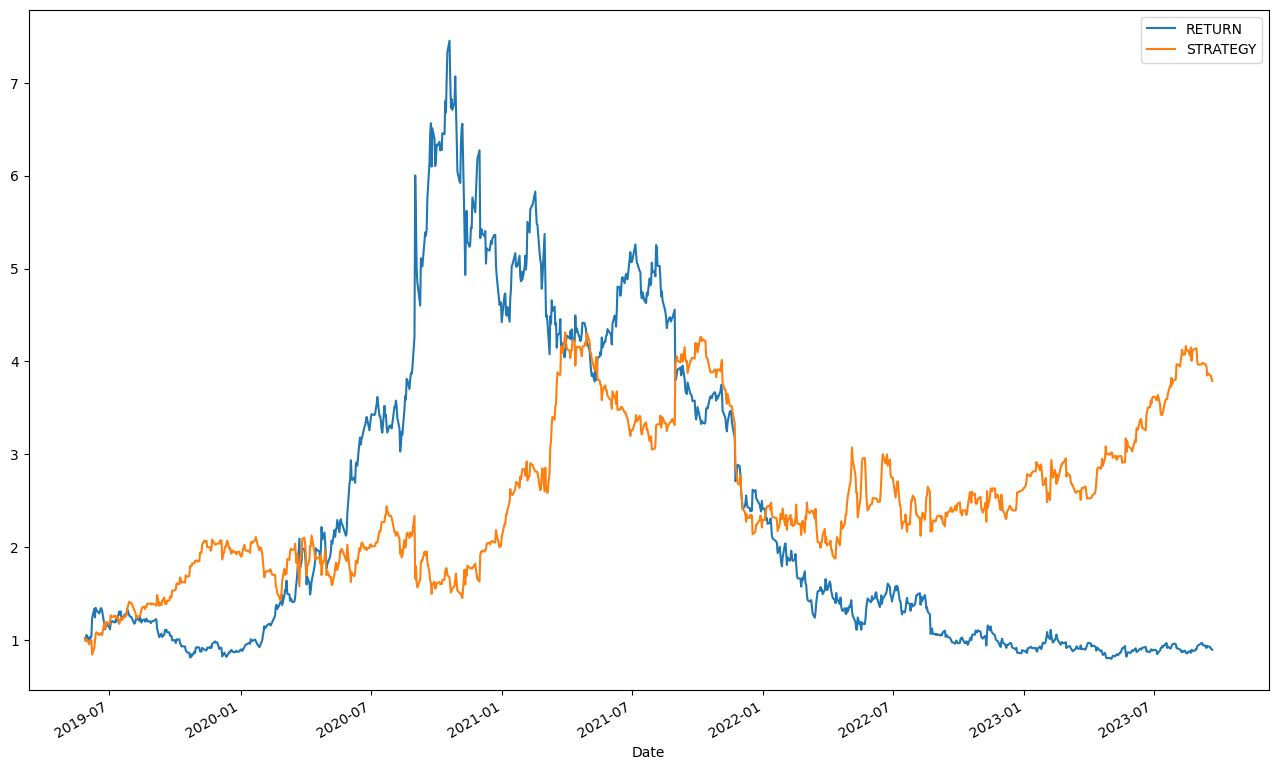

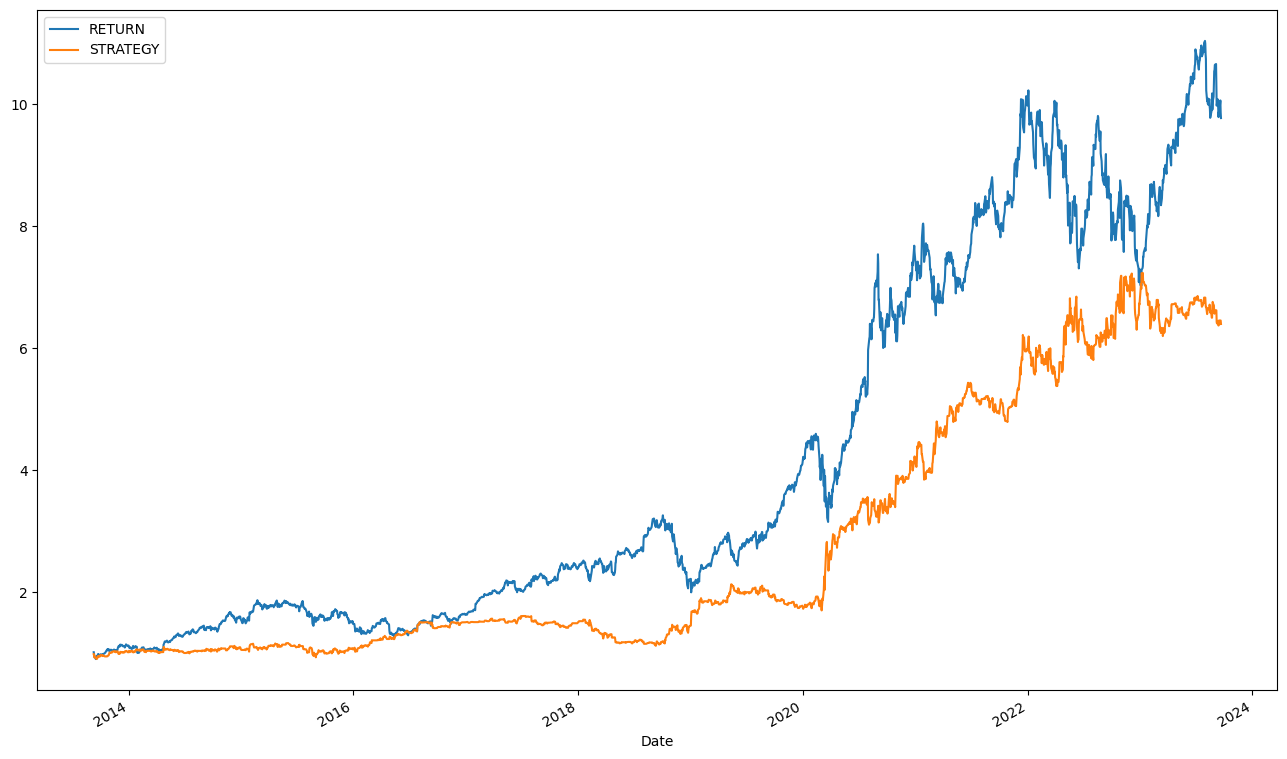

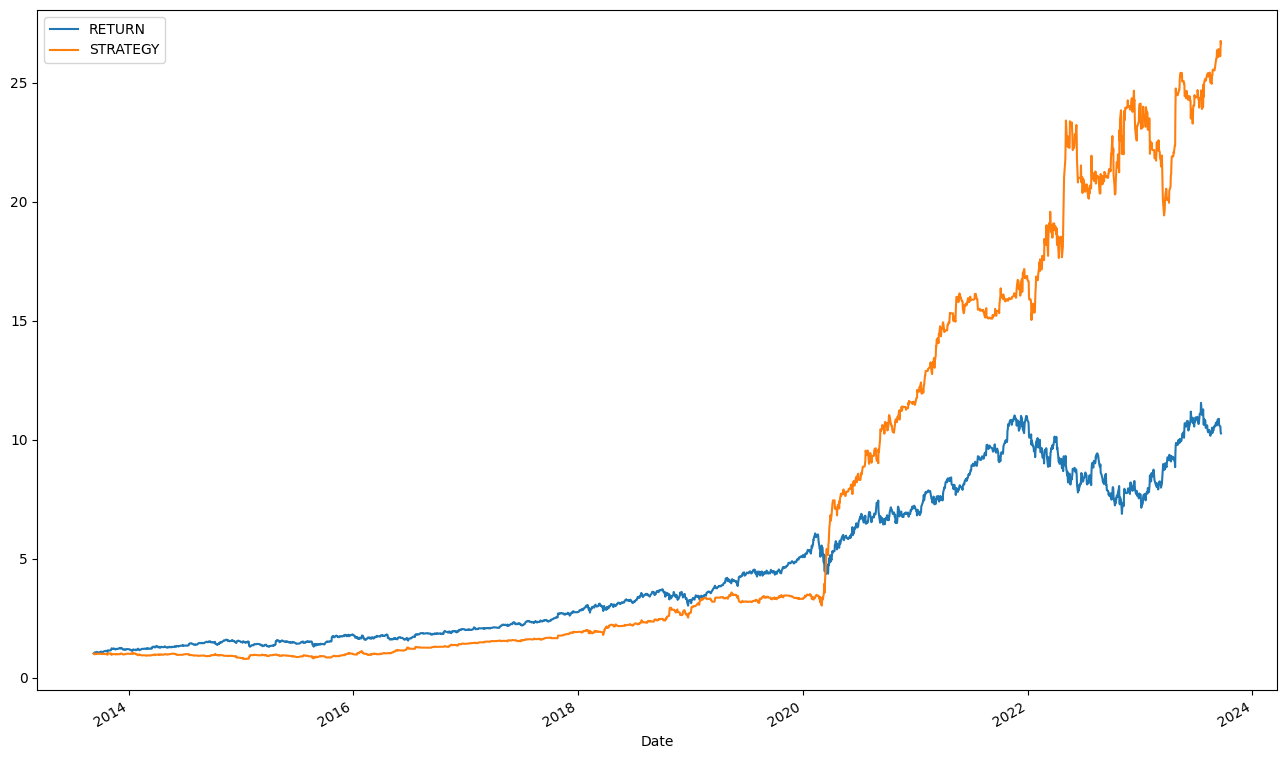

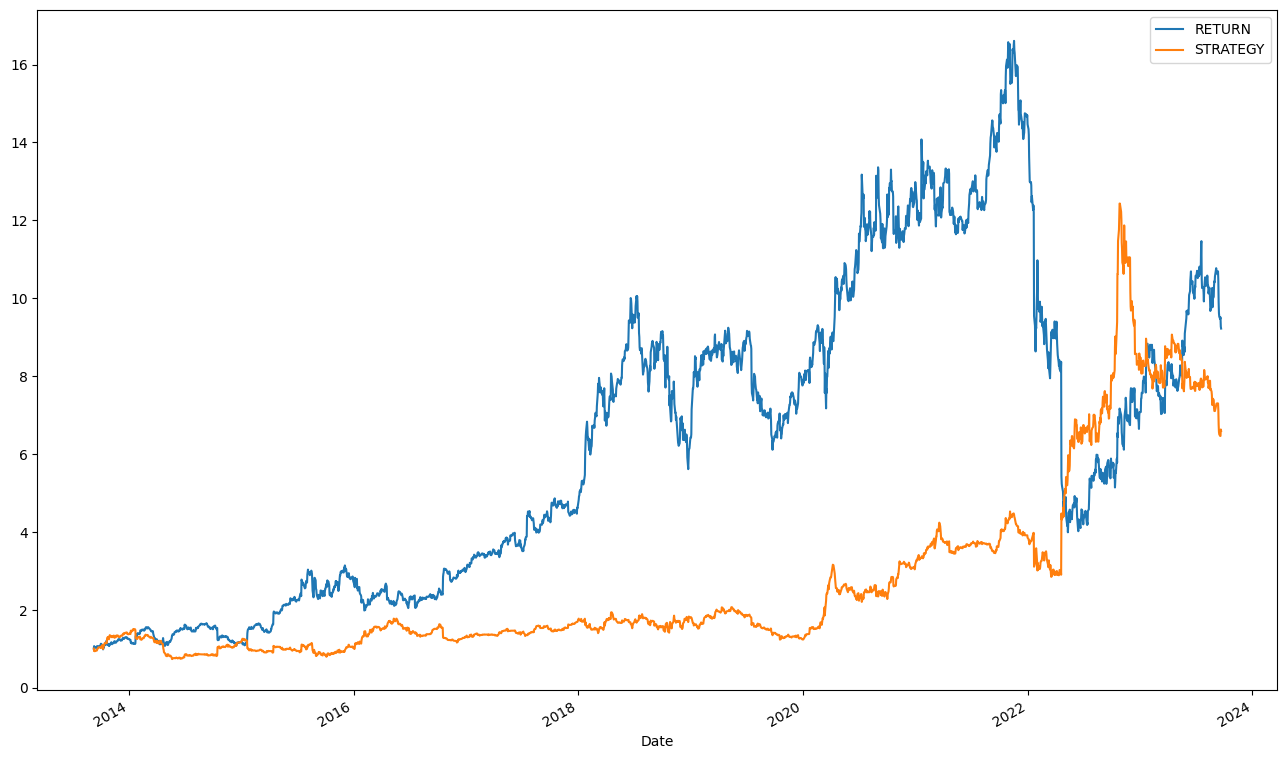

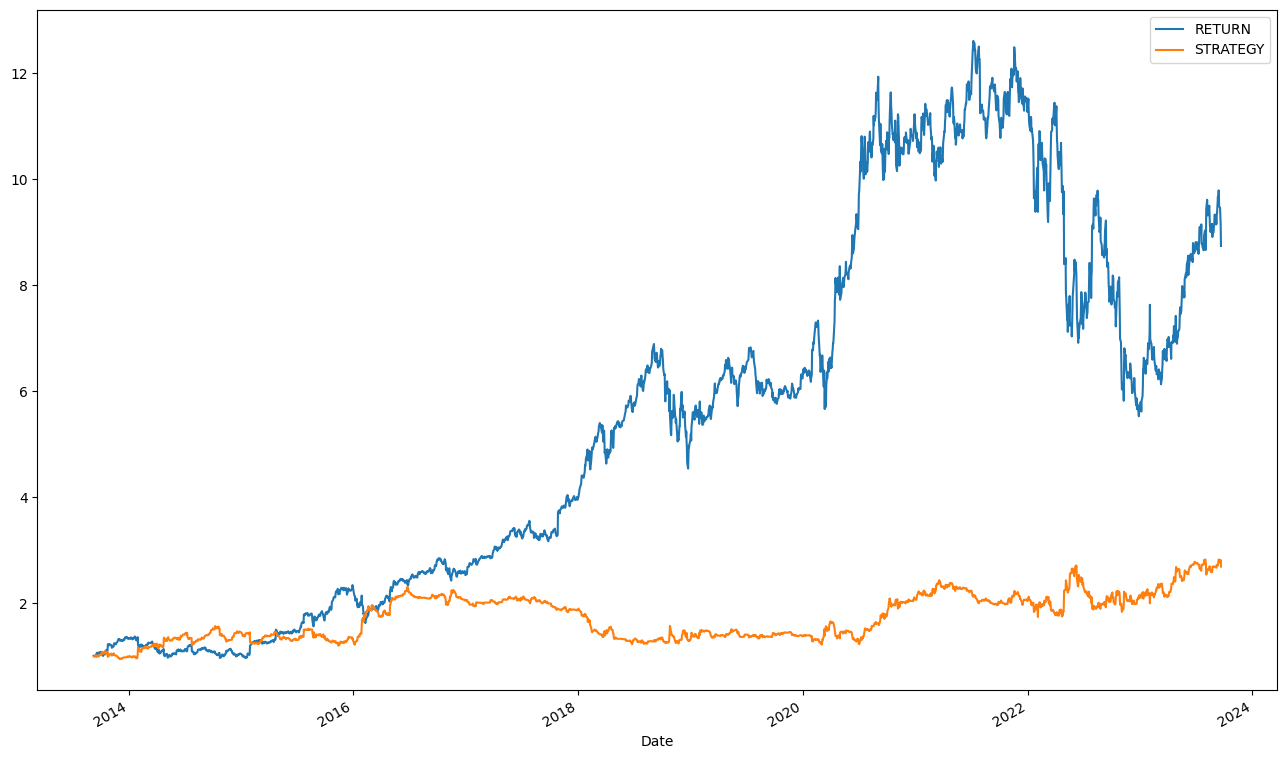

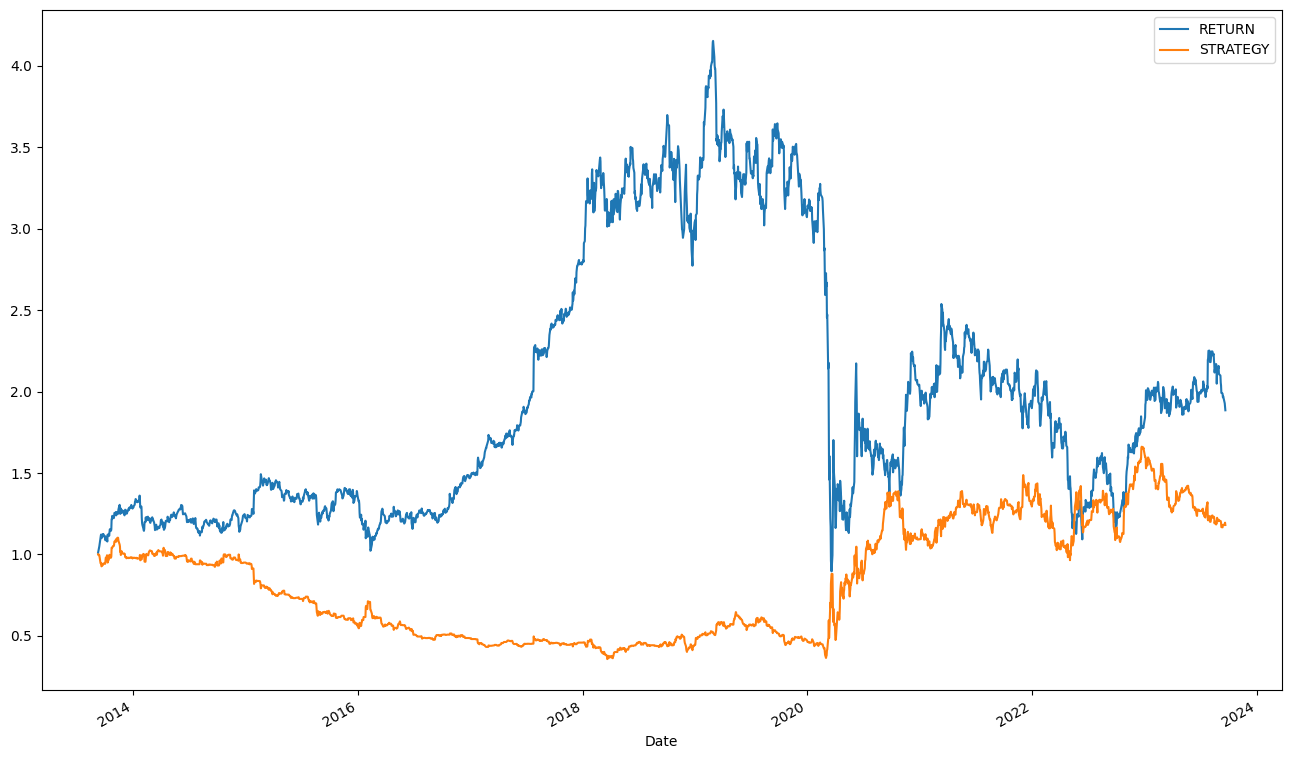

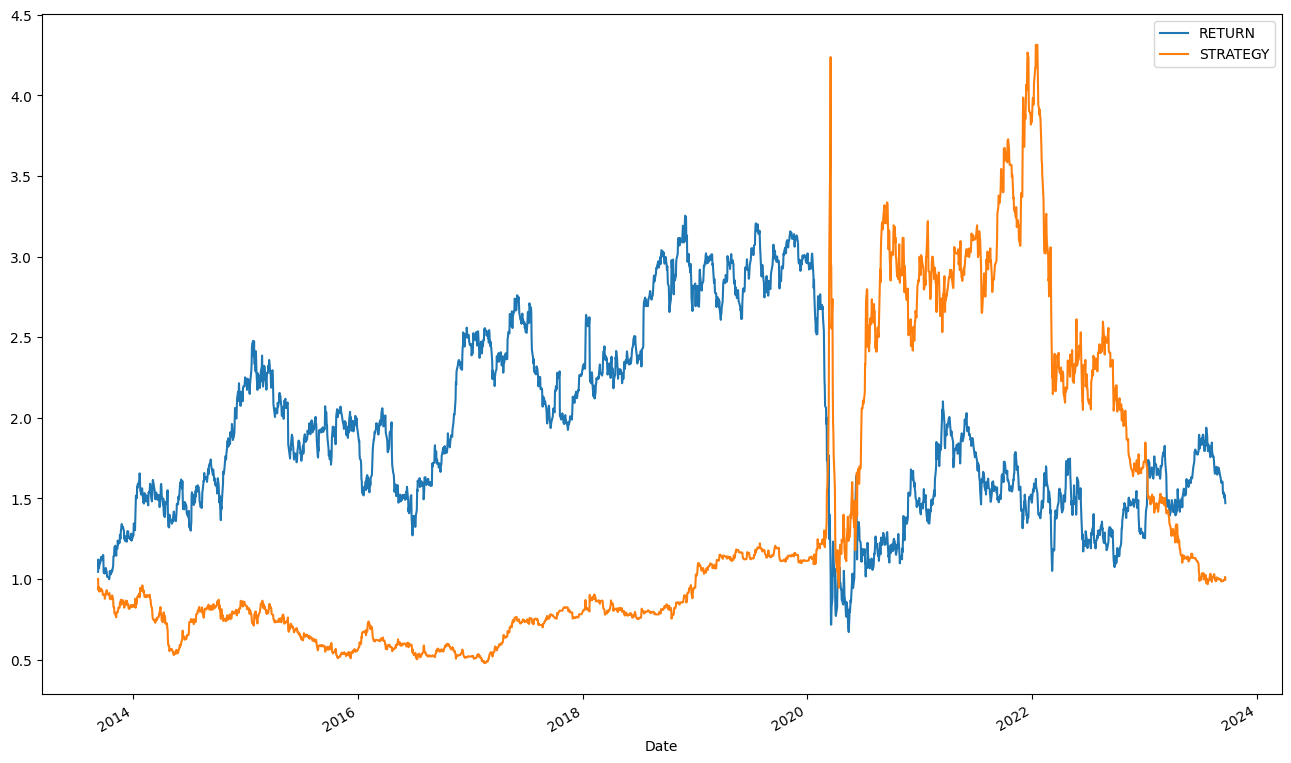

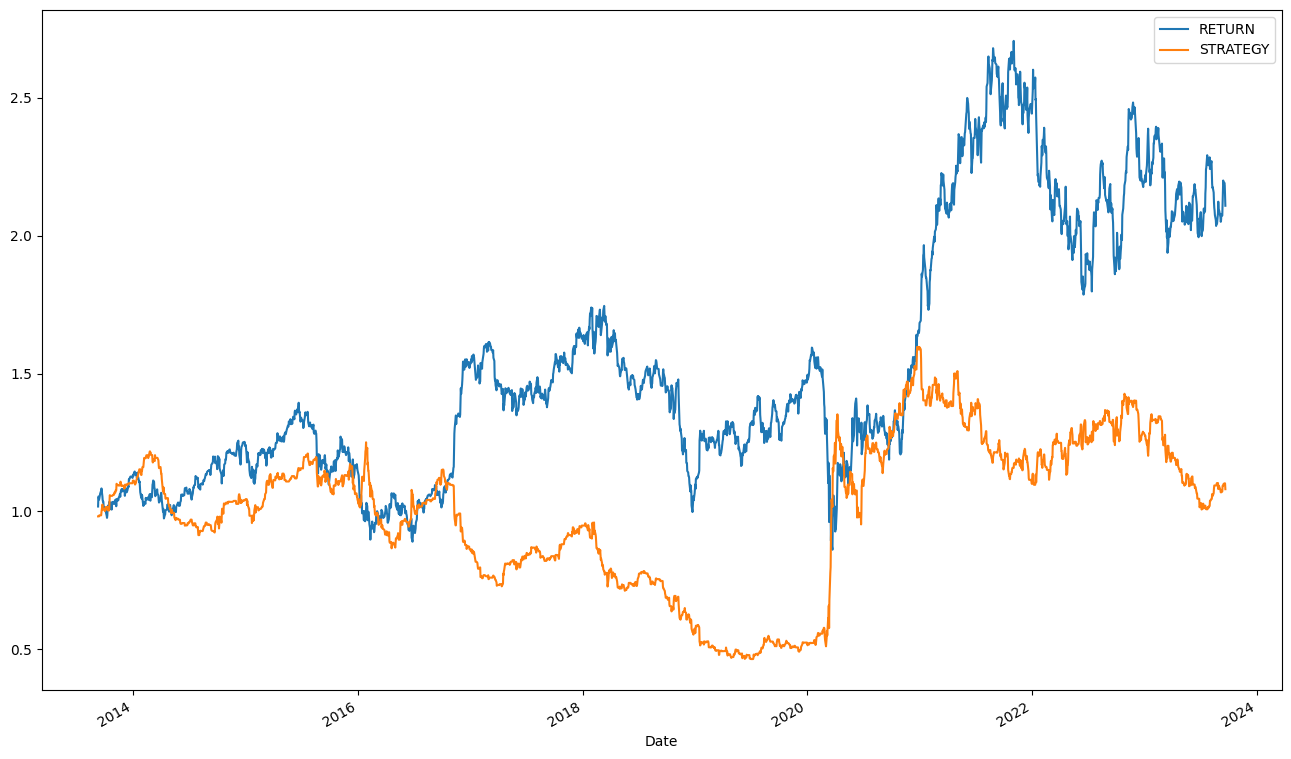

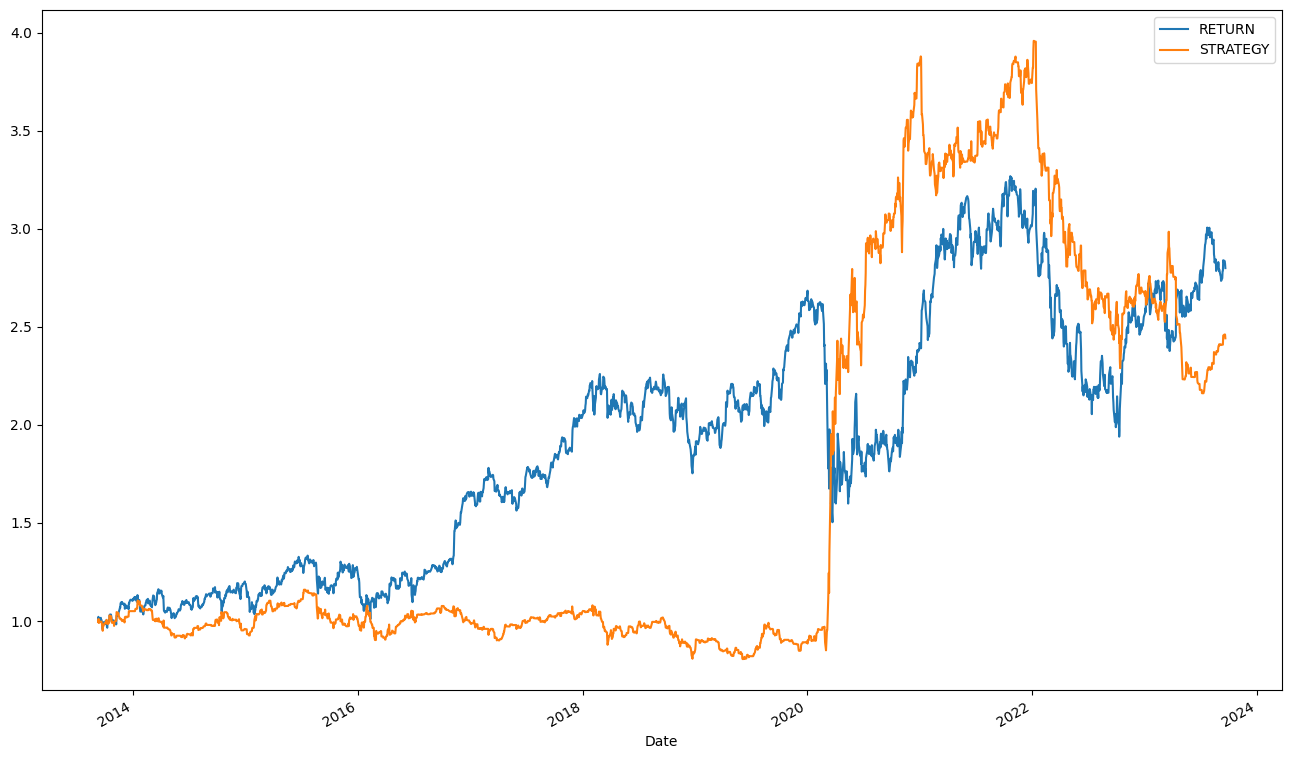

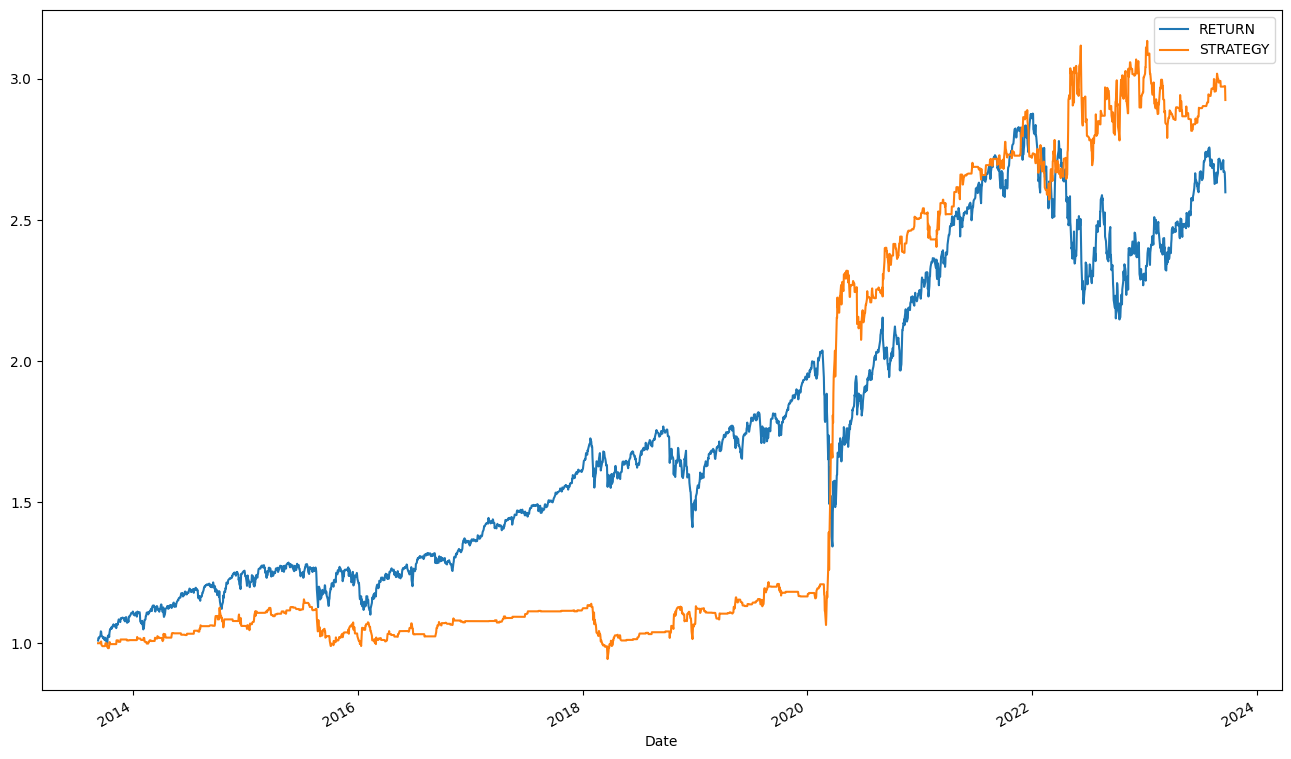

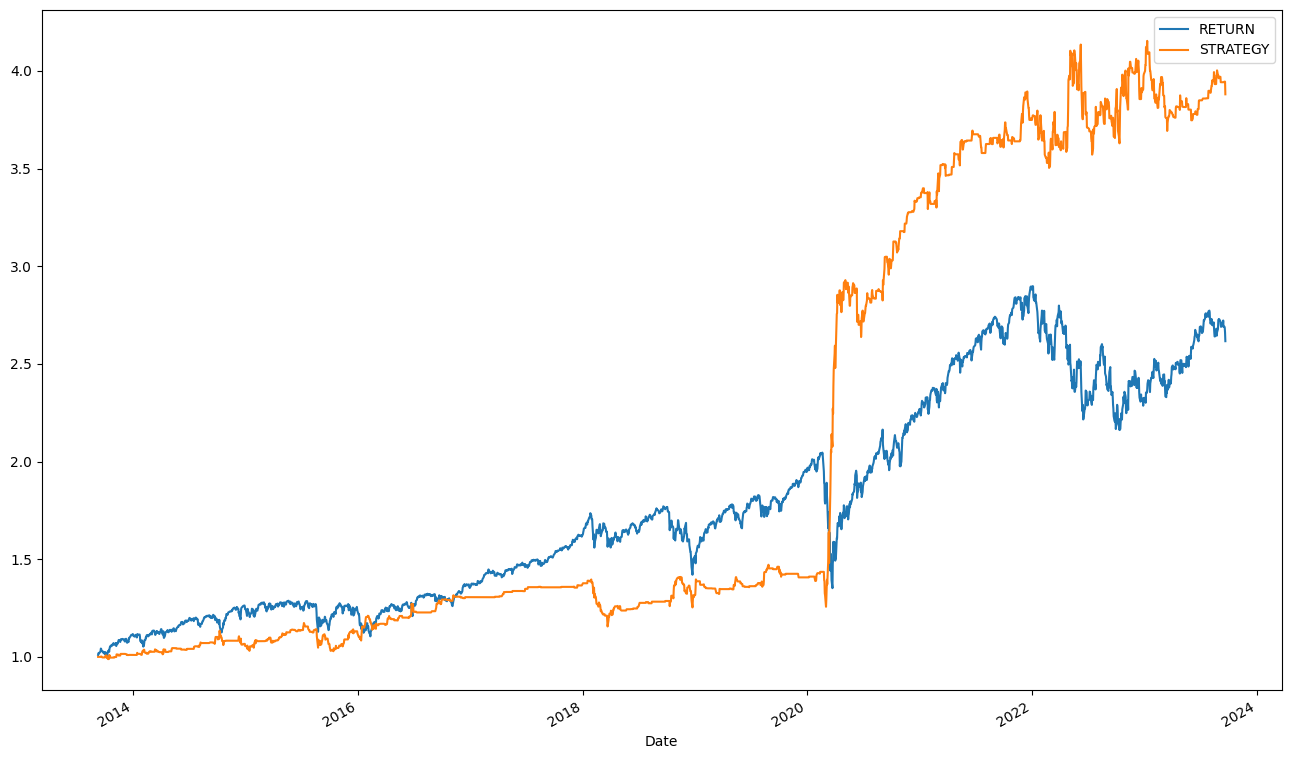

In [120]:
Mean_Rev_all = plot_all_returns(stock_dict, start, end, OLS_outcome)
Mean_Rev_all


#### No. 8 Back Test on profit margin

In [40]:
# Fetch the Treasury yield data for the Risk-Free rate of return
TNX20130801_20230919 = pdr.get_data_yahoo(TICKERS[0], start, end)

# Write the DataFrame to a CSV file
TNX20130801_20230919.to_csv("TNX.csv")  # Set index=False to exclude the index column

# Fetch the Treasury yield data for the Risk-Free rate of return
SPX20130801_20230919 = pdr.get_data_yahoo(TICKERS[-1], start, end)

# Write the DataFrame to a CSV file
SPX20130801_20230919.to_csv("SPX.csv")  # Set index=False to exclude the index column


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [41]:
TNX = pd.read_csv("TNX.csv")
TNX = TNX.set_index("Date")
TNX.index = pd.to_datetime(TNX.index)
TNX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-01,2.601,2.723,2.599,2.723,2.723,0
2013-08-02,2.737,2.737,2.598,2.602,2.602,0
2013-08-05,2.617,2.661,2.617,2.640,2.640,0
2013-08-06,2.635,2.665,2.633,2.642,2.642,0
2013-08-07,2.642,2.642,2.587,2.600,2.600,0
...,...,...,...,...,...,...
2023-09-18,4.337,4.359,4.311,4.319,4.319,0
2023-09-19,4.333,4.365,4.325,4.365,4.365,0
2023-09-20,4.339,4.361,4.313,4.349,4.349,0


In [42]:
Rf = ((TNX[['Close']] / 100 + 1) ** (1/365) - 1) * 100
Rf.index = pd.to_datetime(Rf.index)
Rf.columns = ['Rf daily']
Rf

,Rf daily
Date,
2013-08-01,0.007361
2013-08-02,0.007038
2013-08-05,0.007139
2013-08-06,0.007145
2013-08-07,0.007033
...,...
2023-09-18,0.011585
2023-09-19,0.011706
2023-09-20,0.011664


In [43]:
end 

datetime.date(2023, 9, 24)

In [44]:
SPX =\
(
    pd
    .read_csv("SPX.csv")
    .set_index("Date")
)
SPX.index = pd.to_datetime(SPX.index)
SPX

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-08-01,1689.420044,1707.849976,1689.420044,1706.869995,1706.869995,3775170000
2013-08-02,1706.099976,1709.670044,1700.680054,1709.670044,1709.670044,3136630000
2013-08-05,1708.010010,1709.239990,1703.550049,1707.140015,1707.140015,2529300000
2013-08-06,1705.790039,1705.790039,1693.290039,1697.369995,1697.369995,3141210000
2013-08-07,1695.300049,1695.300049,1684.910034,1690.910034,1690.910034,3010230000
...,...,...,...,...,...,...
2023-09-18,4445.129883,4466.359863,4442.109863,4453.529785,4453.529785,3161230000
2023-09-19,4445.410156,4449.850098,4416.609863,4443.950195,4443.950195,3614880000
2023-09-20,4452.810059,4461.029785,4401.379883,4402.200195,4402.200195,3308450000


In [45]:
Rm =\
(
    SPX['Close']
    .pct_change()
    .to_frame()
    .apply(lambda x: x * 100)    
)
Rm.columns = ['Rm']
Rm

,Rm
Date,
2013-08-01,NaN
2013-08-02,0.164046
2013-08-05,-0.147983
2013-08-06,-0.572303
2013-08-07,-0.380586
...,...
2023-09-18,0.072129
2023-09-19,-0.215101
2023-09-20,-0.939479


In [47]:
UOB = stock['UOB']

In [48]:
Rp =\
(
    UOB['Close']
    .pct_change()
    .to_frame()
    .apply(lambda x: x * 100)    
)
Rp.columns = ['R_UOB']
Rp

,R_UOB
Date,
2013-08-01,NaN
2013-08-02,0.550463
2013-08-05,-0.228099
2013-08-06,-0.823047
2013-08-07,0.276623
...,...
2023-09-18,-1.027401
2023-09-19,-1.211074
2023-09-20,-0.140102


In [49]:
Rf

,Rf daily
Date,
2013-08-01,0.007361
2013-08-02,0.007038
2013-08-05,0.007139
2013-08-06,0.007145
2013-08-07,0.007033
...,...
2023-09-18,0.011585
2023-09-19,0.011706
2023-09-20,0.011664


In [50]:
Rm

,Rm
Date,
2013-08-01,NaN
2013-08-02,0.164046
2013-08-05,-0.147983
2013-08-06,-0.572303
2013-08-07,-0.380586
...,...
2023-09-18,0.072129
2023-09-19,-0.215101
2023-09-20,-0.939479


In [51]:
exRm = pd.concat([Rm, Rf], axis = 1)
exRm

,Rm,Rf daily
Date,,
2013-08-01,NaN,0.007361
2013-08-02,0.164046,0.007038
2013-08-05,-0.147983,0.007139
2013-08-06,-0.572303,0.007145
2013-08-07,-0.380586,0.007033
...,...,...
2023-09-18,0.072129,0.011585
2023-09-19,-0.215101,0.011706
2023-09-20,-0.939479,0.011664


In [52]:
exRm['excess Rm'] = exRm['Rm'] - exRm['Rf daily']

exRm.index = pd.to_datetime(exRm.index)
exRm

,Rm,Rf daily,excess Rm
Date,,,
2013-08-01,NaN,0.007361,NaN
2013-08-02,0.164046,0.007038,0.157008
2013-08-05,-0.147983,0.007139,-0.155123
2013-08-06,-0.572303,0.007145,-0.579448
2013-08-07,-0.380586,0.007033,-0.387619
...,...,...,...
2023-09-18,0.072129,0.011585,0.060544
2023-09-19,-0.215101,0.011706,-0.226807
2023-09-20,-0.939479,0.011664,-0.951143


In [53]:
Cal_beta = pd.concat([Rp, Rf], axis = 1)
Cal_beta["excess R_UOB"] = Cal_beta["R_UOB"] - Cal_beta["Rf daily"]
Cal_beta = pd.concat([Cal_beta, exRm[['excess Rm']]], axis = 1)
Cal_beta.isnull().sum()

R_UOB            74
Rf daily         68
excess R_UOB    142
excess Rm        69
dtype: int64

In [54]:
beta_regression = Cal_beta.copy().dropna()
beta_regression

,R_UOB,Rf daily,excess R_UOB,excess Rm
Date,,,,
2013-08-02,0.550463,0.007038,0.543425,0.157008
2013-08-05,-0.228099,0.007139,-0.235238,-0.155123
2013-08-06,-0.823047,0.007145,-0.830191,-0.579448
2013-08-07,0.276623,0.007033,0.269590,-0.387619
2013-08-12,0.873566,0.007046,0.866520,-0.122338
...,...,...,...,...
2023-09-18,-1.027401,0.011585,-1.038986,0.060544
2023-09-19,-1.211074,0.011706,-1.222780,-0.226807
2023-09-20,-0.140102,0.011664,-0.151766,-0.951143


In [55]:
beta_result = []

X = beta_regression['excess Rm']  # Predictor variable (X)
Y = beta_regression['excess R_UOB']  # Target variable (Y, last column)

    # Perform linear regression
beta, alpha, r_value, p_value, std_err = stats.linregress(X, Y)

    # Store the regression results
result = {
        'Asset': 'UOB',
        'Slope Coefficients': beta,
        'Intercepts': alpha,
        'R-squared': r_value ** 2,
        'P-value': p_value,
        'Standard Error': std_err
}
beta_result.append(result)

# Create a DataFrame from the regression results
beta_result = pd.DataFrame(beta_result)
beta_result.set_index('Asset')


,Slope Coefficients,Intercepts,R-squared,P-value,Standard Error
Asset,,,,,
UOB,0.184389,0.003406,0.033282,5.498907e-20,0.019971


#### No. 9 OUT-OF-SAMPLE

#### No. 10 Discussion and limitation

#### a)	Price taker
#### b)	Long only
#### c)	Little spread between close and adjusted close
#### d)	No liquidity issue
#### e)	No outliner data to bias training data (black swan)


#### No. 11 Extension

#### a)	Short position
#### b)	Forex
#### c)	Leveraging
#### d)	Stock dividend
#### e)	Other marking


#### No. 12 Money Management

#### a)	Risk / reward ratio
#### b)	Win / loss ratio
#### c)	2% risk of portfolio value per trade
#### d)	10% risk of portfolio value per long period, before reviewing on model


#### No. 13 API trading

#### a)	IBker: Interactive Brokers for US stocks
#### b)	MT4: Forex / Indices / Commodities
#### c)	TraderWagon (Binance): Cryptos
